In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist

import tensorflow.keras.backend as K

In [ ]:
#first we will load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def load_and_resize_images_from_folder(folder, target_size=(28, 28)):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                if img_path.endswith(".jpg") or img_path.endswith(".png"):
                    # Load image in grayscale
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        # Resize the image
                        img_resized = cv2.resize(img, target_size)
                        images.append(img_resized)
                        labels.append(subfolder)  # Use subfolder name as label
    return images, labels

# Assuming you have a folder with subfolders containing images
folder_path = "/content/drive/MyDrive/kanji"
images, labels = load_and_resize_images_from_folder(folder_path)

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Splitting the data into training and testing sets
# Adjust the test_size according to your preference
x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.3, random_state=42)

# Convert the lists to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(labels_encoded))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Now you have x_train, x_test, y_train, and y_test ready to be used for training your AI model


In [ ]:
print(labels_encoded)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
['fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky',

In [ ]:
#Now we will se our dataset

print("Dimension of x_train",x_train.shape)
print("Dimension of x_test",x_test.shape)
print("Dimension of y_test",y_test.shape)

Dimension of x_train (70, 28, 28)
Dimension of x_test (30, 28, 28)
Dimension of y_test (30, 5)


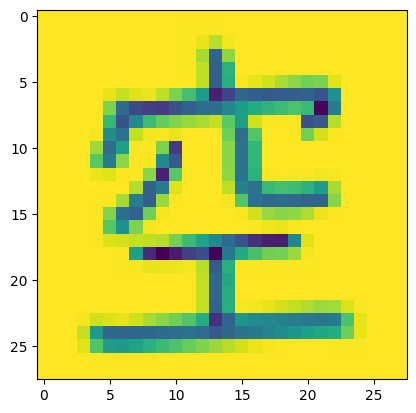

[0. 0. 0. 1. 0.]


In [ ]:
#we will see a single image in out dataset
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_train[4])
plt.show()
print(y_train[4])

In [ ]:
num_classes = 5
epochs = 30
img_rows = 28
img_cols = 28
#as each image is 28 by 28 pixel

In [ ]:
#build our model
#BY DEFAULT STRIDE IS 1
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile our model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1, 1, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 194,437 (759.52 KB)

 Trainable params: 193,925 (757.52 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
#fit the model
his = model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.2529 - loss: 2.8166 - val_accuracy: 0.1667 - val_loss: 1.6088
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3888 - loss: 1.8185 - val_accuracy: 0.2000 - val_loss: 1.6082
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5007 - loss: 1.5182 - val_accuracy: 0.2000 - val_loss: 1.6071
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4890 - loss: 1.2328 - val_accuracy: 0.2000 - val_loss: 1.6057
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6118 - loss: 0.9801 - val_accuracy: 0.2000 - val_loss: 1.6050
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6086 - loss: 0.9377 - val_accuracy: 0.2000 - val_loss: 1.6050
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5292 - loss: 0.9353 - val_accuracy: 0.2000 - val_loss: 1.6049
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6456 - loss: 0.7560 - val_accuracy: 0.2000 - val_loss: 1.6047
E

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(x_test)
pred_y = np.argmax(y_pred, axis=1)
true_y = np.argmax(y_test, axis=1)

# Printing classification report
print(classification_report(true_y, pred_y))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.25      0.17      0.20         6
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.23      1.00      0.38         6

    accuracy                           0.23        30
   macro avg       0.10      0.23      0.11        30
weighted avg       0.10      0.23      0.12        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score ,acc = model.evaluate(x_test,y_test)
print("Score is :",score)
print("Accuracy :",acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2333 - loss: 1.7959
Score is : 1.7959097623825073
Accuracy : 0.23333333432674408


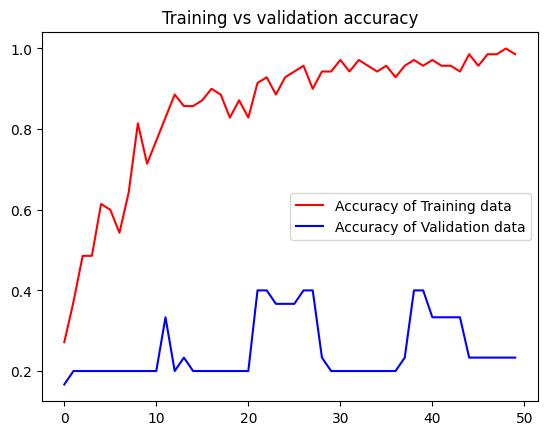

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

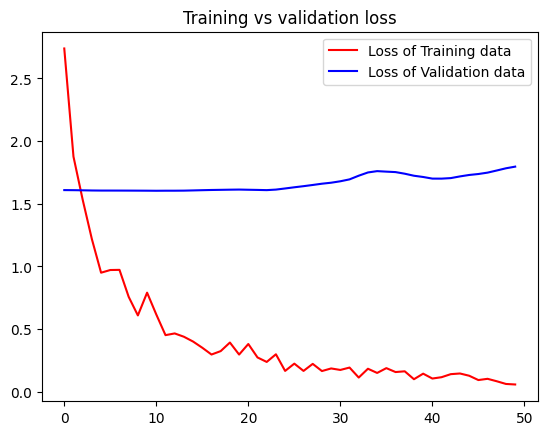

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
!pip install scikit-plot

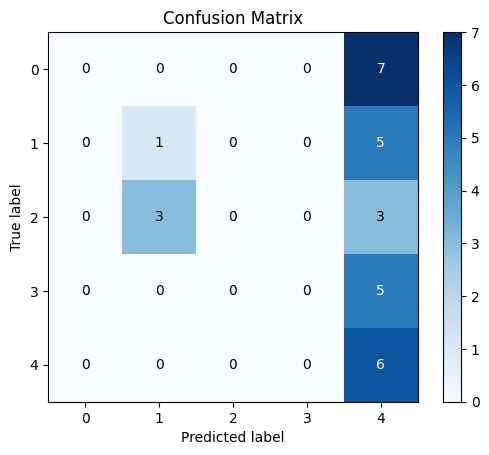

In [ ]:
import scikitplot as skplot
from mlxtend.plotting import plot_confusion_matrix

skplot.metrics.plot_confusion_matrix(true_y,pred_y,normalize=False)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


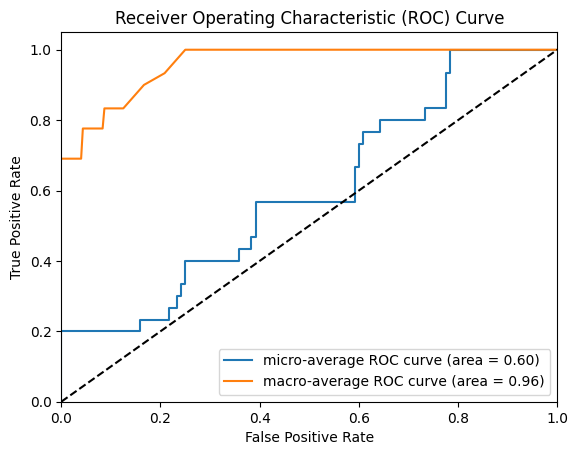

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming model.predict() returns probabilities for each class
y_pred_proba = model.predict(x_test)

# Get the class with the highest probability as the predicted class
pred_y = np.argmax(y_pred_proba, axis=1)

# Ensure pred_y has the correct shape
pred_y = np.expand_dims(pred_y, axis=1)  # Add an additional axis

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro))

# Compute macro-average ROC curve and ROC area
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):  # Assuming 5 classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):  # Assuming 5 classes
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 5  # Number of classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot macro-average ROC curve
plt.plot(fpr_macro, tpr_macro, label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc_macro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#save our model

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("models.weights.h5")

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'/home/ubuntu/love/keras')

failed to lookup keras version from the file,
    this is likely a weight only file
